# A remark on *Grid cells on steeply sloping terrain*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


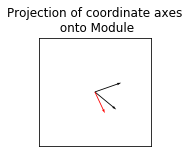

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 1
S = np.ones(m)*.4
k = 3
B, V, S = create_kd_hyper_module(m, k, scale=S)
# V = np.zeros((m,k))


plt.figure(figsize=(2,2))
plt.title("Projection of coordinate axes\n onto Module")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])


r1 = B[0,0,:] / S[0]
r2 = B[0,1,:] / S[0]

plt.quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
for l in range(2,k):
    plt.quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

# plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()






(10000, 2)


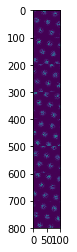

In [20]:


T = 30000



box = np.indices((100,100)).reshape((2,-1)).T
box = box/100.
print box.shape

F = np.zeros((100,100, 8))

dz = 1./F.shape[2]

for z in range(F.shape[2]):
    X       = np.zeros((T, 3))
    X[:,:2] = np.random.sample((T,2)) - np.array([0.0,0.])
    X[:,2] = z*dz

    Q = map_to_hypertorus(B, V, X )
    P = map_to_hypertorus(B, V, np.zeros((T,3)))


    D = M_dist_comp_unskewed(Q[:,0], P[:,0], B[0,:2,:2], S=S)

    weights = np.exp(- D**2/0.005)


    
    heat, _, _ = np.histogram2d(X[:,0], X[:,1],
                                weights=weights, 
                                bins=[
                                    np.linspace(0.,1., num = F.shape[0] +1),
                                    np.linspace(0.,1., num = F.shape[1] +1)]);
    F[:,:,z] = heat



img = np.concatenate([F[:,:,z] for z in range(F.shape[2])], axis=0 )

plt.imshow(img)


0.0 9.70827443939


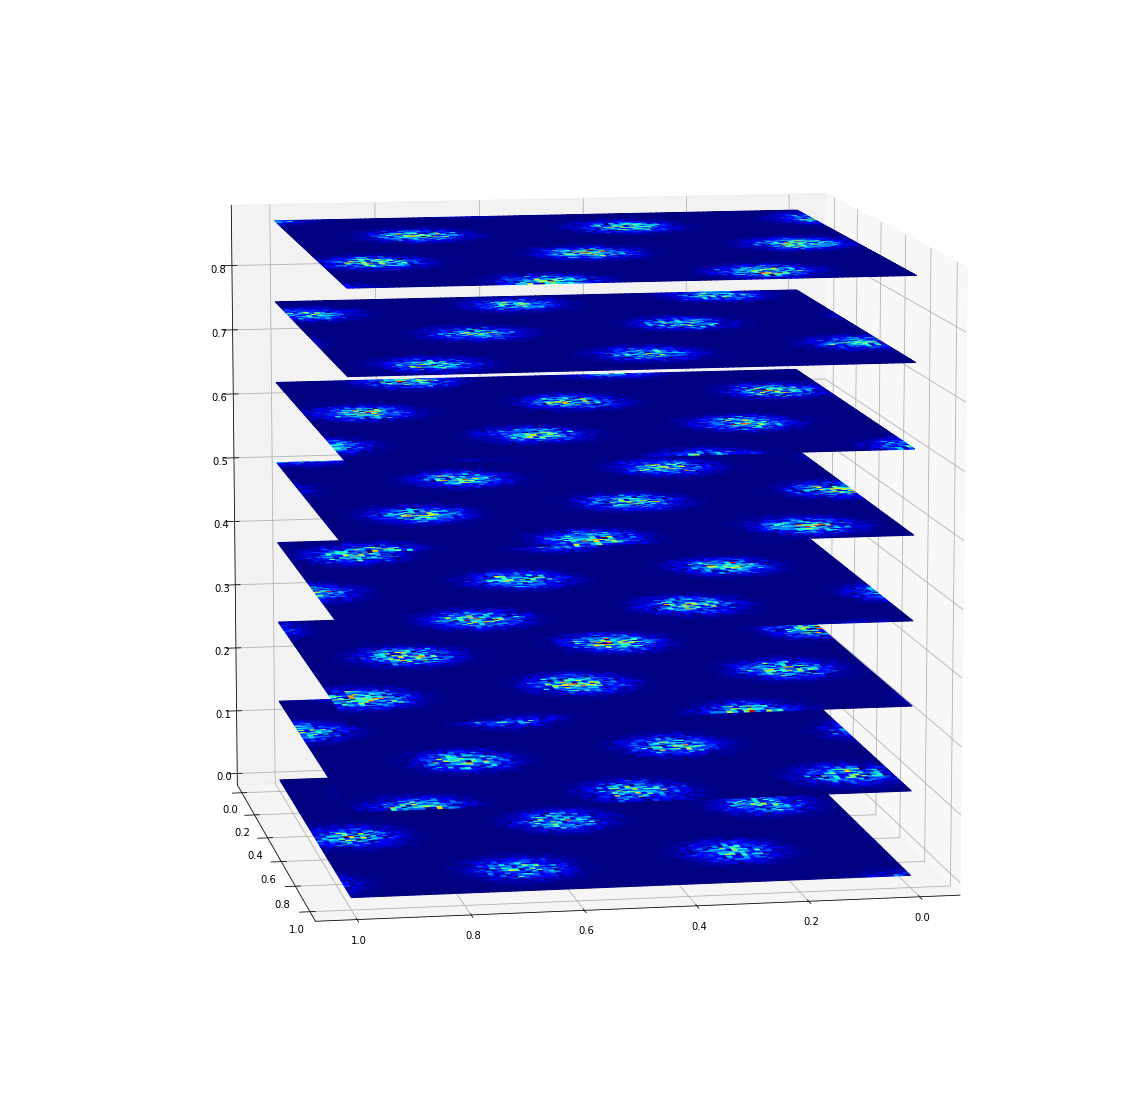

In [21]:


from matplotlib import cm;
from mpl_toolkits.mplot3d import Axes3D;
# plt.interactive(True);


# Creat mesh.
X = np.linspace(0.,1., num = 100);
Y = np.linspace(0.,1., num = 100);
X, Y = np.meshgrid(X, Y);

# Create flat surface.
Z = np.zeros_like(X);

# Plot
fig = plt.figure(figsize=(20,20));
ax = fig.gca(projection='3d');

print np.amin(F), np.amax(F)

ax.view_init(10, 80)
for z in range(F.shape[2]):
    f = F[:,:,z]
    f = f - np.amin(f)
    f = f/np.amax(f)
    ax.plot_surface(X, Y, Z + z*dz, rstride=1, cstride=1,  facecolors = cm.jet(f), shade=False);


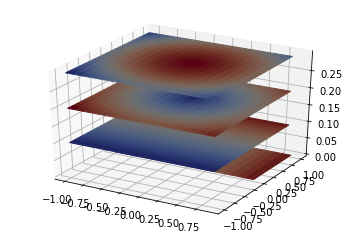

In [3]:
import numpy;
from matplotlib import pyplot;
from matplotlib import cm;
from mpl_toolkits.mplot3d import Axes3D;
# pyplot.interactive(True);
%matplotlib inline

# Creat mesh.
X = numpy.arange(-1, 1, 0.1);
Y = numpy.arange(-1, 1, 0.1);
X, Y = numpy.meshgrid(X, Y);

# Create some data to plot.
A = numpy.copy(X);
B = numpy.copy(Y);
C = numpy.sqrt(X**2 + Y**2);
D = numpy.cos(C);
# Normalize data for colormap use.
A -= numpy.min(A); A /= numpy.max(A);
B -= numpy.min(B); B /= numpy.max(B);
C -= numpy.min(C); C /= numpy.max(C);
D -= numpy.min(D); D /= numpy.max(D);

# Create flat surface.
Z = numpy.zeros_like(X);

# Plot
fig = pyplot.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors = cm.coolwarm(A));
ax.plot_surface(X, Y, Z+0.1, rstride=1, cstride=1, facecolors = cm.coolwarm(B));
ax.plot_surface(X, Y, Z+0.2, rstride=1, cstride=1, facecolors = cm.coolwarm(C));
ax.plot_surface(X, Y, Z+0.3, rstride=1, cstride=1, facecolors = cm.coolwarm(D));